In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#rows = sc.textFile("/home/srikanthy/Downloads/train_2v.csv")

In [5]:
#rows.take(5)

Read Input CSV file into Spark DataFrame

In [6]:
df = spark.read.csv('/home/srikanthy/Downloads/train_2v.csv',header=True, inferSchema=True)

shape of spark dataframe rows, columns

In [7]:
df.count(), len(df.columns)

(43400, 12)

checking the column types of df

In [8]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [9]:
df.groupBy('stroke').count().show()

+------+-----+
|stroke|count|
+------+-----+
|     1|  783|
|     0|42617|
+------+-----+



In [10]:
df.groupBy('gender').count().show()

+------+-----+
|gender|count|
+------+-----+
|Female|25665|
| Other|   11|
|  Male|17724|
+------+-----+



In [11]:
df.groupBy('hypertension').count().show()

+------------+-----+
|hypertension|count|
+------------+-----+
|           1| 4061|
|           0|39339|
+------------+-----+



In [12]:
df.filter('stroke = 1').groupby('hypertension').count().show()

+------------+-----+
|hypertension|count|
+------------+-----+
|           1|  200|
|           0|  583|
+------------+-----+



In [13]:
df.groupBy('heart_disease').count().show()

+-------------+-----+
|heart_disease|count|
+-------------+-----+
|            1| 2062|
|            0|41338|
+-------------+-----+



In [14]:
df.filter('stroke = 1').groupby('heart_disease').count().show()

+-------------+-----+
|heart_disease|count|
+-------------+-----+
|            1|  177|
|            0|  606|
+-------------+-----+



In [15]:
df.select('age', 'avg_glucose_level', 'bmi').describe().show()

+-------+------------------+------------------+------------------+
|summary|               age| avg_glucose_level|               bmi|
+-------+------------------+------------------+------------------+
|  count|             43400|             43400|             41938|
|   mean| 42.21789400921646|104.48274999999916|28.605038390004545|
| stddev|22.519648680503554|  43.1117509512961| 7.770020497238766|
|    min|              0.08|              55.0|              10.1|
|    max|              82.0|            291.05|              97.6|
+-------+------------------+------------------+------------------+



In [16]:
df.createOrReplaceTempView('patient_info')

In [102]:
sql("SELECT work_type, count(work_type) as work_type_count FROM patient_info WHERE stroke == 1 GROUP BY work_type ORDER BY work_type_count DESC").show()

+-------------+---------------+
|    work_type|work_type_count|
+-------------+---------------+
|      Private|            441|
|Self-employed|            251|
|     Govt_job|             89|
|     children|              2|
+-------------+---------------+



In [125]:
sql("SELECT ever_married, count(ever_married) as married_type_count FROM patient_info WHERE stroke == 1 GROUP BY ever_married ORDER BY married_type_count DESC").show()

+------------+------------------+
|ever_married|married_type_count|
+------------+------------------+
|         Yes|               703|
|          No|                80|
+------------+------------------+



In [107]:
sql("SELECT age, count(age) as age_count FROM patient_info WHERE stroke == 1 GROUP BY age ORDER BY age_count DESC").show()


+----+---------+
| age|age_count|
+----+---------+
|79.0|       70|
|78.0|       57|
|80.0|       49|
|81.0|       43|
|82.0|       36|
|70.0|       25|
|77.0|       24|
|74.0|       24|
|76.0|       24|
|67.0|       23|
|75.0|       23|
|72.0|       21|
|59.0|       20|
|68.0|       20|
|69.0|       20|
|57.0|       19|
|71.0|       19|
|63.0|       18|
|65.0|       18|
|66.0|       17|
+----+---------+
only showing top 20 rows



In [126]:
df.filter((df['stroke'] == 1) & (df['age'] > '50')).count()

708

In [19]:
from pyspark.sql.functions import isnan, when, count, col

missing_percent = df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns])

In [20]:
missing_percent.show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|1462|         13292|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+----+--------------+------+



In [21]:
print(df.corr('stroke', 'hypertension'))
print(df.stat.corr('stroke', 'heart_disease'))

0.07533224882587926
0.11376293746830313


In [17]:
df_pd = df.toPandas()

In [18]:
df_pd.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,None,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,None,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,None,0


In [19]:
from pyspark.sql.functions import udf
from pyspark.sql.types import LongType

In [ ]:
squared_udf = udf(squared, LongType())
df = spark.table("test")
display(df.select("id", squared_udf("id").alias("id_squared")))

In [20]:
def squared(x):
    return x*x
    

In [21]:
squared_udf = udf(squared, LongType())

In [23]:
from pyspark.sql.functions import col

In [24]:
df_new = df.withColumn('hypertension_squared',squared_udf(col('hypertension')))

In [26]:
df_new.select('hypertension_squared','hypertension').show()

+--------------------+------------+
|hypertension_squared|hypertension|
+--------------------+------------+
|                   0|           0|
|                   1|           1|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   1|           1|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
|                   0|           0|
+--------------------+------------+
only showing top 20 rows



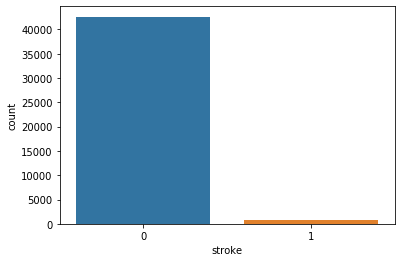

In [153]:
sns.countplot(x='stroke', data=df_pd);


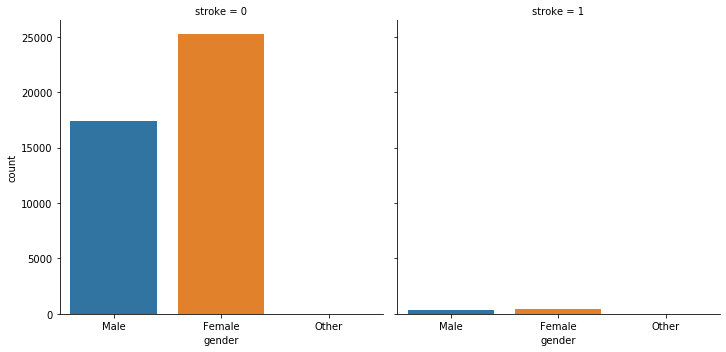

In [156]:
sns.catplot(x='gender', col='stroke', kind='count', data=df_pd);

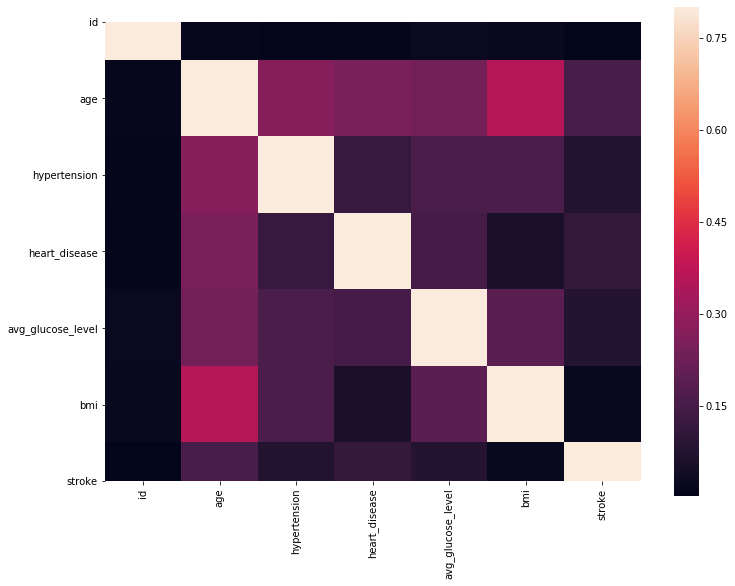

In [157]:
corrmat = df_pd.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [128]:
from pyspark.sql.functions import mean
mean = df.select(mean(df['bmi'])).collect()
mean_bmi = mean[0][0]
df = df.na.fill(mean_bmi,['bmi'])

In [25]:
df = df.na.fill('No Info', subset=['smoking_status'])

In [26]:
spark.sql("select * from patient_info limit 10").show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|30669|  Male| 3.0|           0|            0|          No|     children|         Rural|            95.12|18.0|           null|     0|
|30468|  Male|58.0|           1|            0|         Yes|      Private|         Urban|            87.96|39.2|   never smoked|     0|
|16523|Female| 8.0|           0|            0|          No|      Private|         Urban|           110.89|17.6|           null|     0|
|56543|Female|70.0|           0|            0|         Yes|      Private|         Rural|            69.04|35.9|formerly smoked|     0|
|46136|  Male|14.0|           0|            0|         

gender, ever_married, work_type, Residence_type, smoking_status are categorical variables. We will apply label encoding as below

In [27]:
from pyspark.ml.feature import IndexToString, StringIndexer, OneHotEncoderEstimator

In [29]:
stage_1 = StringIndexer(inputCol= 'gender', outputCol= 'gender_index')
stage_2 = StringIndexer(inputCol= 'ever_married', outputCol= 'ever_married_index')
stage_3 = StringIndexer(inputCol= 'work_type', outputCol= 'work_type_index')
stage_4 = StringIndexer(inputCol= 'Residence_type', outputCol= 'Residence_type_index')
stage_5 = StringIndexer(inputCol= 'smoking_status', outputCol= 'smoking_status_index')
stage_6 = OneHotEncoderEstimator(inputCols=['gender_index','ever_married_index','work_type_index','Residence_type_index','smoking_status_index'], outputCols=['gender_OHE','ever_married_OHE','work_type_OHE','Residence_type_OHE','smoking_status_OHE'])

In [30]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=[stage_1, stage_2, stage_3, stage_4, stage_5, stage_6])

In [31]:
pipeline_model = pipeline.fit(df)
df_updated = pipeline_model.transform(df)

In [32]:
df_updated.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+------------+------------------+---------------+--------------------+--------------------+----------------+------------------+------------------+-------------+-------------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|gender_index|ever_married_index|work_type_index|Residence_type_index|smoking_status_index|ever_married_OHE|smoking_status_OHE|Residence_type_OHE|   gender_OHE|work_type_OHE|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+------------+------------------+---------------+--------------------+--------------------+----------------+------------------+------------------+-------------+-------------+
|30669|  Male| 3.0|           0|            0|          No|     children|   

In [33]:
from pyspark.ml.feature import VectorAssembler

In [34]:
assembler = VectorAssembler(inputCols=['gender_OHE',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'avg_glucose_level',
 'bmi',
 'smoking_status_OHE'],outputCol='features')

In [35]:
from pyspark.ml.classification import GBTClassifier

In [36]:
#dtc = DecisionTreeClassifier(labelCol='stroke',featuresCol='features')

In [80]:
gbt = GBTClassifier(labelCol="stroke", featuresCol="features", maxIter=10)

In [81]:
pipeline = Pipeline(stages=[assembler, gbt])

In [82]:
train_df,test_df = df_updated.randomSplit([0.7,0.3])

In [83]:
model = pipeline.fit(train_df)

In [84]:
#dtc_predictions = model.transform(test_df)

In [85]:
gbt_predictions = model.transform(test_df)

In [86]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [87]:
#acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
#dtc_acc = acc_evaluator.evaluate(dtc_predictions)
#print('A Decision Tree algorithm had an accuracy of: {0:2.2f}%'.format(dtc_acc*100))

In [88]:
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
gbt_acc = acc_evaluator.evaluate(gbt_predictions)
print("Test Error = %g" % (1.0 - gbt_acc))

Test Error = 0.0174195


In [69]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [70]:
my_eval = BinaryClassificationEvaluator(labelCol='stroke', metricName="areaUnderROC")

In [71]:
print(my_eval.evaluate(gbt_predictions))

0.8496182336182374


In [72]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(labelCol="stroke" ,featuresCol="features", regParam=0.3,maxIter=10)

In [76]:
pipeline2 = Pipeline(stages=[assembler, lr])

In [77]:
model_lr = pipeline2.fit(train_df)

In [78]:
lr_predictions = model_lr.transform(test_df)

In [79]:
lr_acc = acc_evaluator.evaluate(lr_predictions)
print("Test Error = %g" % (1.0 - lr_acc))

Test Error = 0.0180222


In [91]:
[stage.coefficients for stage in model_lr.stages if hasattr(stage, "coefficients")]


[DenseVector([-0.0091, 0.0093, 0.0027, 0.1105, 0.198, 0.0546, -0.0038, 0.0645, -0.0541, -0.0064, 0.0011, 0.0007, 0.0008, -0.0044, -0.0246, 0.0399])]

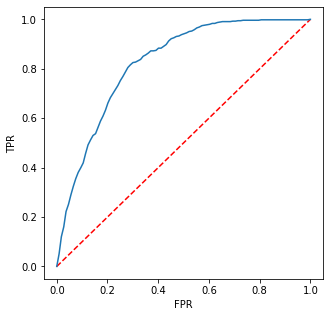

In [94]:
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(model_lr.stages[-1].summary.roc.select('FPR').collect(),
         model_lr.stages[-1].summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [134]:
evaluator = BinaryClassificationEvaluator()
lr_predictions.groupBy('stroke', 'prediction').count().show()

+------+----------+-----+
|stroke|prediction|count|
+------+----------+-----+
|     1|       0.0|  234|
|     0|       0.0|12750|
+------+----------+-----+



In [146]:
TN = lr_predictions.filter('prediction = 0 AND stroke = prediction').count()
TP = lr_predictions.filter('prediction = 1 AND stroke = prediction').count()
FN = lr_predictions.filter('prediction = 0 AND stroke <> prediction').count()
FP = lr_predictions.filter('prediction = 1 AND stroke <> prediction').count()

In [147]:
accuracy = (TN + TP) / (TN + TP + FN + FP)
recall = TP / (TP + FN)

In [148]:
print('n recall: %0.3f' % recall)
print('n accuracy: %0.3f' % accuracy)

n recall: 0.000
n accuracy: 0.982


In [2]:
df_pd

NameError: name 'df_pd' is not defined